In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

# Project 1
Due March 12, 2019.

For the midterm project, you will develop a Tolman-Oppenheimer-Volkov (TOV) solver to compute the hydrostatic structure of a relativistic neutron star. You will use this to determine the maximum masses of cold neutron stars (NSs) for several different equations of state (EOS).

Your code should adhere to the course Coding Standards.

  - Write a numerical solver for the spherically-symmetric TOV equations using a fourth-order Runge-Kutta integrator. Assume a polytropic EOS specified by $K$ and $\gamma$. You may find these notes particularly helpful.
  
  ---
  These are the equations we will be solving
\begin{align}
\frac{dm}{dr} &= 4\pi r^2 \rho \\
\frac{dP}{dr} &= -\frac{\rho m }{r^2}\left ( 1 + \frac{P}{\rho}\right ) \left( 1 + \frac{4\pi P^3}{m} \right ) \left ( 1 - \frac{2m}{r}\right ) ^{-1}\\
\frac{d\Phi}{dr} &= - \frac{1}{\rho} \frac{dP}{dr}\left( 1 + \frac{P}{\rho}\right ) ^{-1}
\end{align}

  
# Part 1, polytropes
For a polytropic eos: $P = K \rho_0^\Gamma$, where $K$ is the polytropic gas constant and $n$ defined by $\Gamma \equiv 1 + 1/n$ is the polytropic index. We then have   $\rho = \rho_0 + P/(\Gamma -1 )$  and $\rho_0 \epsilon = P/(\Gamma -1 )$.
   
Below, all constants are the corresponding barred ones, scaled by the factor $K$. See `polytrope_star.py` and `base_star.py` for implementation of the solvers. 

In [2]:
from polytrope_star import PolytropeStar
import numpy as np
import matplotlib.pyplot as plt

/home/halvard/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Comparison with BS, $n = 1$, $\Gamma = 2$

6.534625556560139e-31
1.216592317194853e-31
7.380036373700256e-31
1.0493512515258225e-30
4.48245825344952e-30
9.2837656013147e-31
9.193451454815225e-31
4.270896227923528e-31
1.9787735014011953e-30
3.62189198991843e-30
0.16151886459991338


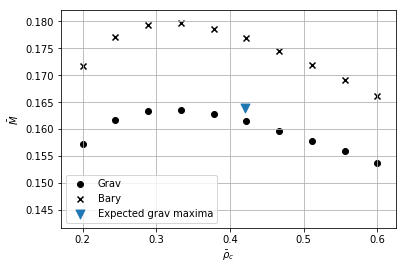

In [90]:
test_star = PolytropeStar(gamma = 2)
integrator = 'dopri5'

for rhoc_bar in np.linspace(0.2, 0.6, 10):
    test_star.set_initial_conditions(rhoc = rhoc_bar)
    solver =  test_star.solve_star_ivp(integrator = integrator)
    print(solver.y[1][-1])
    s1 = plt.scatter(rhoc_bar, solver.y[0][-1], c='k')
    s2 = plt.scatter(rhoc_bar, solver.y[3][-1], c='k', marker='x')
solver = test_star.set_initial_conditions(rhoc = 0.420).solve_star_ivp(
                    integrator = integrator)
print(solver.y[0][-1])
s3 = plt.scatter(0.42, 0.164, marker='v', s = 80)
plt.legend([s1,s2,s3], ['Grav','Bary','Expected grav maxima'])
plt.xlabel(r'$\bar\rho_c$')
plt.ylabel(r'$\bar M$')
plt.grid()

## The given values, $n = 4/7, \Gamma = 2.75$
  - Determine the maximum mass of a cold NS for $K=30000$ (in $G=c=M_\odot=1$ units) and $\gamma=2.75$.
  
First we calculate

In [110]:
gamma = 2.75 # n = 4/7
n = 1/(gamma - 1)

values = []

N = 200
polytrope = PolytropeStar(gamma)

for rhoc_bar in np.linspace(0.1, 2.2, N):
    polytrope.set_initial_conditions(rhoc = rhoc_bar)
    solver = polytrope.solve_star_ivp()

    r = solver.t
    M, P, Phi, M0 = solver.y
    values.append([r[-1], M[-1], P[-1], Phi[-1], M0[-1], rhoc_bar])
   

Then we plot 

<IPython.core.display.Math object>


Maximum values for K = 30000, \gamma = 2.75:
     M_bar = 0.128
     R     = 11.97  km
     M     = 2.434 M_sun   
     M_0   = 2.896 M_sun     
     rho_c = 1.395e+15 g/cc      



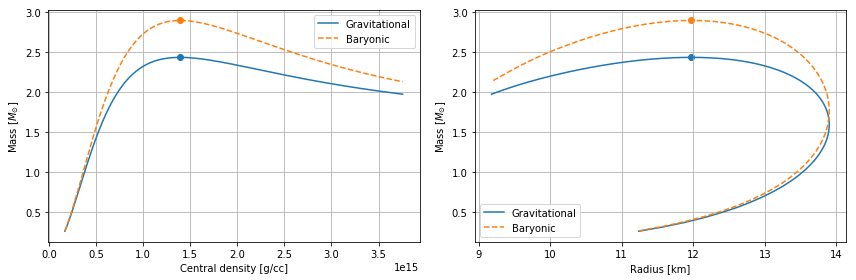

In [111]:
K     = 30000      # C = G = M_sun = 1
 
radius, grav_mass, pressure, _, mass, rhoc_bar = np.array(values).T
imax = np.argmax(grav_mass)

M_max_sun = grav_mass[imax] * K**(n/2)

length_conv  = 6.7706e-6
density_conv = 1.6199e-18
rhoc_cgs = rhoc_bar * K**(-n)/density_conv
r_km     = radius * K**(n/2)/length_conv * 1e-5

from IPython.display import display, Latex, Math
display(Math("Ax=b"))

disp_string = r"""
Maximum values for K = 30000, \gamma = 2.75:
     M_bar = {mbar:.3f}
     R     = {r:.4g}  km
     M     = {gm:.3f} M_sun   
     M_0   = {bm:.3f} M_sun     
     rho_c = {cd:.4g} g/cc      
""".format(mbar = grav_mass[imax], r =  r_km[imax],
           gm =  grav_mass[imax] * K**(n/2),
           bm =  mass[imax] * K**(n/2), 
           cd =  rhoc_cgs[imax])

print(disp_string)

fig, [ax1, ax2] = plt.subplots(1,2, figsize = [12,4])
ax1.scatter(rhoc_cgs[imax], grav_mass[imax] * K**(n/2), c = 'C0')
ax1.scatter(rhoc_cgs[imax], mass[imax]* K**(n/2), c = 'C1')

ax2.scatter(r_km[imax], grav_mass[imax] * K**(n/2), c = 'C0')
ax2.scatter(r_km[imax], mass[imax]* K**(n/2), c = 'C1')

ax1.plot(rhoc_cgs, grav_mass* K**(n/2), '-', label = 'Gravitational')
ax1.plot(rhoc_cgs, mass* K**(n/2), '--', label = 'Baryonic')
ax1.legend()
ax1.set_ylabel('Mass [$M_{\odot}$]')
ax1.set_xlabel('Central density [g/cc]')
ax1.grid()

ax2.plot(r_km, grav_mass* K**(n/2), '-', label = 'Gravitational')
ax2.plot(r_km, mass* K**(n/2), '--', label = 'Baryonic')
ax2.legend()
ax2.set_xlabel('Radius [km]')
ax2.set_ylabel('Mass [$M_{\odot}$]')
ax2.grid()
fig.tight_layout()

# Part 2, table stars

 
  - Now, modify your code to use any arbitrary table-based EOS. Specifically, make your solver compatible with the EOS available on https://stellarcollapse.org/equationofstate. There is example code on that site in C++ and Fortran for reading and using the tables there, and working with the EOS tables is trivial in Python using h5py.
 
---
 
See `table_star.py` for the source code. The function `run_star` in `tools.py` runs the code

In [18]:
from table_star import TableStar
from tools import run_star

  - Determine the maximum mass for any five of the EOS available on stellarcollapse.org.

## Calculate final values for five tables
See [stellarcollapse.org](https://stellarcollapse.org/equationofstate) for the hdf5-tables.

First we calculate

h5_files/GShen_NL3EOS_rho280_temp180_ye52_version_1.1_20120817.h5


/home/halvard/uio/PHY905_NumericalRelativity/project1/table_star.py:94: UserWarning: Error, more than one root in munu! Using closest to previous
  warnings.warn('Error, more than one root in munu! Using closest to previous')
/home/halvard/uio/PHY905_NumericalRelativity/project1/table_star.py:38: RuntimeWarning: invalid value encountered in log10
  logP = np.log10(P)
/home/halvard/anaconda3/lib/python3.6/site-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: larger nsteps is needed
  self.messages.get(istate, unexpected_istate_msg)))
/home/halvard/uio/PHY905_NumericalRelativity/project1/base_star.py:161: UserWarning: Something went wrong in the integration, and we need a better error message
  # print("P", P, 'm', m)
/home/halvard/uio/PHY905_NumericalRelativity/project1/base_star.py:151: UserWarning: negative mass!
  else:


h5_files/Hempel_SFHoEOS_rho222_temp180_ye60_version_1.1_20120817.h5
h5_files/Hempel_SFHxEOS_rho234_temp180_ye60_version_1.1_20120817.h5
h5_files/HShenEOS_rho220_temp180_ye65_version_1.1_20120817.h5
h5_files/LS220_234r_136t_50y_analmu_20091212_SVNr26.h5


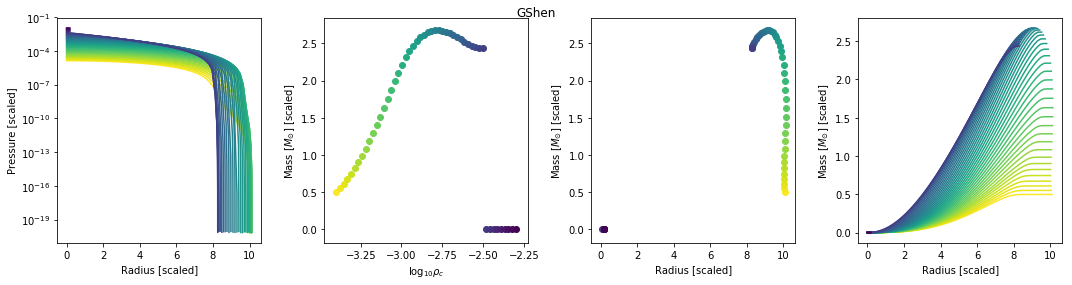

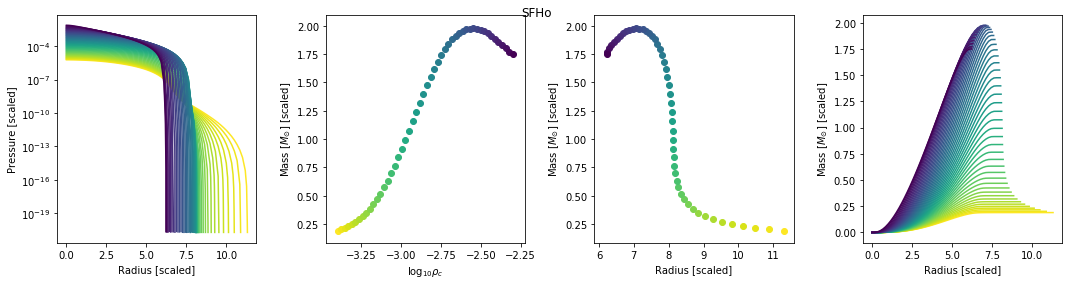

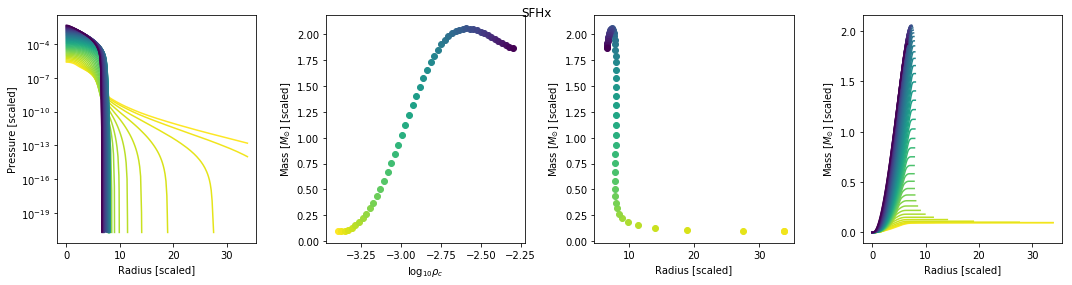

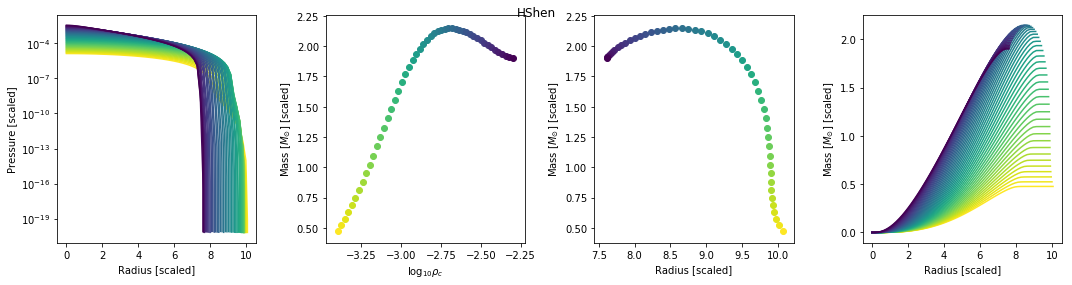

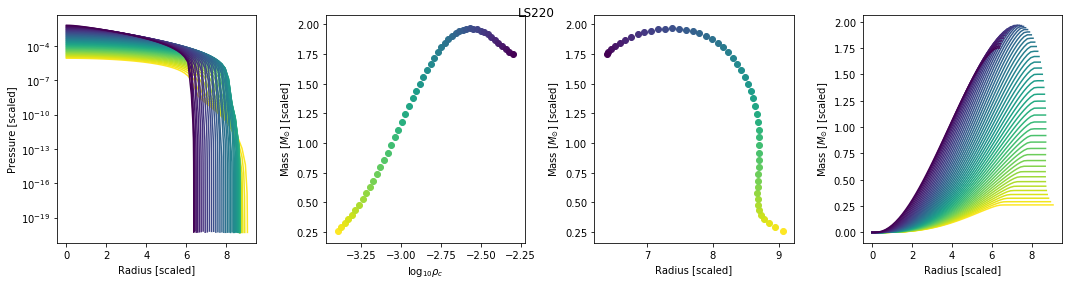

In [72]:
fvals = []
# stevenames = ['Hempel_SFHoEOS_rho222_temp180_ye60_version_1.1_20120817.h5.dat',
#              'Hempel_SFHxEOS_rho234_temp180_ye60_version_1.1_20120817.h5.dat',
#              'Hempel_TM1EOS_rho234_temp180_ye60_version_1.1_20120817.h5.dat',
#              'Hempel_TMAEOS_rho234_temp180_ye60_version_1.1_20120817.h5.dat',
#              'LS220_3335_rho391_temp163_ye66.h5.dat']
filenames = ["GShen_NL3EOS_rho280_temp180_ye52_version_1.1_20120817.h5", 
            "Hempel_SFHoEOS_rho222_temp180_ye60_version_1.1_20120817.h5",
            "Hempel_SFHxEOS_rho234_temp180_ye60_version_1.1_20120817.h5",
            "HShenEOS_rho220_temp180_ye65_version_1.1_20120817.h5",
            "LS220_234r_136t_50y_analmu_20091212_SVNr26.h5"]

# For legends
short_names = ['GShen', 'SFHo','SFHx','HShen','LS220']
# The values we will be running
rho_values = np.linspace(-3.4, -2.3, 50)

for fname, sname in zip(filenames, short_names):
    print('h5_files/' + fname)
    star = TableStar('h5_files/' + fname)
    
    # this line runs everything
    res = run_star(star, rho_values = rho)
    fvals.append(res)
    
    fig = plt.gcf()
    fig.suptitle(sname)

We observe that GShen does not work properly for values of rhoc >= -2.5. 

Then we plot end values


Maximal values for GShen:
     R     = 13.43  km
     M     = 2.674 M_sun   
     M_0   = 3.161 M_sun     
     rho_c = 1.045e+15 g/cc      


Maximal values for SFHo:
     R     = 10.44  km
     M     = 1.976 M_sun   
     M_0   = 2.269 M_sun     
     rho_c = 1.752e+15 g/cc      


Maximal values for SFHx:
     R     = 10.9  km
     M     = 2.057 M_sun   
     M_0   = 2.390 M_sun     
     rho_c = 1.58e+15 g/cc      


Maximal values for HShen:
     R     = 12.79  km
     M     = 2.145 M_sun   
     M_0   = 2.431 M_sun     
     rho_c = 1.22e+15 g/cc      


Maximal values for LS220:
     R     = 10.9  km
     M     = 1.967 M_sun   
     M_0   = 2.258 M_sun     
     rho_c = 1.664e+15 g/cc      



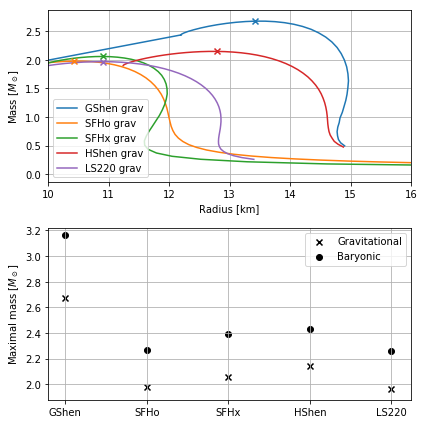

In [112]:
fig, [ax1,ax2] = plt.subplots(2, figsize = [6,6])

disp_string = r"""
Maximal values for {name}:
     R     = {r:.4g}  km
     M     = {gm:.3f} M_sun   
     M_0   = {bm:.3f} M_sun     
     rho_c = {cd:.4g} g/cc      
"""
to_km = 1e-5/6.7706e-6
to_gcc  = 1/1.6199e-18
for i, (final_values, sname) in enumerate(zip(fvals, short_names)):
    rho, r_values, m_values, P_values, phi_values, M0_values = np.array(final_values).T

    c = 'C{}'.format(i)
    ax1.plot(to_km*r_values, m_values, '-', color = c, label = sname + ' grav', zorder=2)
    
    i_max = np.argmax(m_values)
    # assert (i_max == np.argmax(M0_values))
    
    m_max = m_values[i_max]
    M0_max = M0_values[i_max]
    rho_max = rho[i_max]
    r_max = r_values[i_max]
    
    print(disp_string.format(name = sname, r = to_km*r_max, gm = m_max, bm = M0_max,
                            cd = to_gcc*10**rho_max))
    ax1.scatter(to_km*r_max, m_max, c = c, marker = 'x', zorder = 3)
    # ax1.scatter(to_km*r_values[i_max], M0_max, c = c, marker = 'o')
    ax2.scatter(i, m_max, c = 'k', marker = 'x')
    ax2.scatter(i, M0_max, c = 'k', marker = 'o')
    
ax2.set_xticks(range(len(short_names)))
ax2.set_xticklabels(short_names)
ax1.legend()
ax2.legend(['Gravitational','Baryonic'])
ax1.grid()
ax2.grid()

ax1.set_xlabel('Radius [km]')
ax1.set_ylabel(r'Mass [$M_\odot$]')
ax2.set_ylabel(r'Maximal mass [$M_\odot$]')

ax1.set_xlim([10,16])
fig.tight_layout()
# ax2.legend('')